# Carte Carrington

Exemple simple de carte de carrington

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

In [3]:
from module import readFits

data = []
for file in Path('data/L1').glob('*.fts.bz2'):
    data.append(readFits(file))

In [4]:
carrington = data[0][:, 1024:1025]
for image in data[1:]:
    carrington = np.hstack((carrington, image[:,1000:1001]))

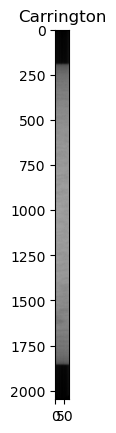

In [5]:
plt.figure()
plt.imshow(carrington, cmap='grey');
plt.title('Carrington');